In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold8_3.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.073532,-0.137312,0.282733,0.083720,-0.203224,-0.184130,0.162200,-0.194846,-0.158898,-0.074829,...,-0.207968,-0.038988,-0.015148,-0.075043,0.134039,-0.127550,Abnormal,P1,FP-A,AB01
1,-0.170323,-0.144238,0.234785,0.296260,-0.217903,-0.189379,0.163410,-0.234621,-0.220291,-0.019988,...,-0.183245,-0.161039,0.128365,0.296792,0.309504,-0.096808,Abnormal,P1,FP-A,AB02
2,-0.181449,-0.152859,-0.157695,0.033461,-0.200052,-0.151878,0.117279,-0.150576,-0.211502,-0.069214,...,-0.140477,-0.171491,-0.061372,0.148441,0.068689,-0.158158,Abnormal,P1,FP-A,AB03
3,-0.182013,-0.175779,0.170395,0.457328,-0.209899,-0.095732,1.000316,-0.232229,-0.212870,0.281321,...,-0.219182,0.773911,0.453935,0.538463,0.781271,-0.169567,Abnormal,P1,FP-A,AB04
4,-0.154250,-0.202830,-0.081837,-0.045834,-0.220811,-0.191688,0.034673,-0.193362,-0.203003,-0.121654,...,-0.222572,-0.011915,-0.128062,-0.084202,-0.144768,-0.156361,Abnormal,P1,FP-A,AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,0.843284,0.441933,-0.145207,0.115132,0.695095,1.011106,-0.145128,0.783063,0.800580,-0.215071,...,0.997947,-0.148869,0.133946,-0.123196,0.051774,0.582146,Normal,P8,FP-E,Normal
7364,0.628452,0.497133,0.008442,0.204830,0.782213,0.986520,-0.130831,0.840254,1.018736,-0.220214,...,0.487129,-0.186995,0.061770,-0.160484,0.098390,0.153022,Normal,P8,FP-E,Normal
7365,0.608563,0.309849,-0.061546,-0.053633,0.718535,1.010926,-0.078436,0.934963,0.677534,-0.210907,...,0.788859,-0.187995,0.173746,-0.127656,0.076143,0.375650,Normal,P8,FP-E,Normal
7366,0.021992,0.129988,-0.187011,-0.144503,0.134347,0.178286,-0.117127,0.238295,0.205396,-0.191095,...,0.086458,-0.142173,-0.167849,-0.165401,-0.107340,0.151485,Normal,P8,FP-E,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(7368, 2048)
(7368,)


In [20]:
y[0]

'FP-A'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.518760,0.100718,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.516452,0.101164,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.517945,0.099939,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.517266,0.099917,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.498264,0.097222,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.708509,0.136662,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.709324,0.139931,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.699688,0.141186,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.688831,0.139539,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.606848,0.124668,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5187595864550764

 **print the array of mean scores only 

[0.51875959 0.5164522  0.51794492 0.51726613 0.49826393 0.70850927
 0.70932356 0.69968807 0.68883104 0.60684823 0.80690815 0.80527974
 0.80283685 0.80215935 0.67783132 0.81016422 0.80975772 0.80704328
 0.805008   0.69425384 0.81057183 0.80948598 0.80636448 0.8074507
 0.69520419]

 **examine the best model 

0.810571832045307
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.810571832045307


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold8_3.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.155984,-0.161607,0.141449,0.187577,-0.134589,-0.141667,0.166550,-0.177672,-0.220467,...,-0.213020,-0.190236,0.265597,0.118994,0.059871,-0.098398,Abnormal,P1,FP-A,AB01
1,1,-0.148687,-0.172450,0.006868,0.232106,-0.238661,-0.196763,-0.007870,-0.250089,-0.218127,...,-0.222324,0.007600,0.266100,0.225148,0.066045,-0.162973,Abnormal,P1,FP-A,AB03
2,2,-0.112576,0.057718,-0.111039,-0.097577,-0.072925,-0.162434,0.228451,-0.215558,-0.101421,...,-0.091239,-0.130222,0.014257,0.059204,0.181619,-0.104105,Abnormal,P1,FP-A,AB04
3,3,-0.155079,-0.179761,0.059030,0.161366,0.015880,-0.190632,0.117847,-0.186183,-0.184482,...,-0.068063,0.220732,-0.112267,-0.013764,-0.044415,-0.183398,Abnormal,P1,FP-A,AB05
4,4,-0.172869,-0.138370,0.067479,0.498978,-0.101842,-0.133188,0.988235,-0.152898,-0.176786,...,-0.192208,0.237822,0.176370,0.174425,0.156044,-0.163919,Abnormal,P1,FP-A,AB06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1051,0.654426,0.165883,-0.114791,0.006441,0.688616,0.644109,-0.053578,0.647476,0.847357,...,0.610763,-0.146984,-0.101852,-0.169434,-0.035481,0.412734,Normal,P8,FP-E,Normal
1052,1052,0.661581,0.526834,-0.018332,0.111603,0.869040,1.473895,-0.136012,0.950485,1.150270,...,0.755904,-0.167638,0.024032,-0.108081,0.188144,0.300245,Normal,P8,FP-E,Normal
1053,1053,0.654426,0.165883,-0.114791,0.006441,0.688616,0.644109,-0.053578,0.647476,0.847357,...,0.610763,-0.146984,-0.101852,-0.169434,-0.035481,0.412734,Normal,P8,FP-E,Normal
1054,1054,0.805190,0.182577,-0.024150,0.026605,0.881689,0.833209,-0.115978,0.914275,0.640903,...,0.655439,-0.120009,0.303386,-0.136629,0.011057,0.192910,Normal,P8,FP-E,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1056, 2048)
(1056,)


In [30]:
y_test

0       FP-A
1       FP-A
2       FP-A
3       FP-A
4       FP-A
        ... 
1051    FP-E
1052    FP-E
1053    FP-E
1054    FP-E
1055    FP-E
Name: Views, Length: 1056, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 84  53  44   0   0]
 [ 22 239  34   0   8]
 [ 11 101 231   9   0]
 [  4  25  45 102   0]
 [  2  11   0   0  31]]
              precision    recall  f1-score   support

        FP-A       0.68      0.46      0.55       181
        FP-B       0.56      0.79      0.65       303
        FP-C       0.65      0.66      0.65       352
        FP-D       0.92      0.58      0.71       176
        FP-E       0.79      0.70      0.75        44

    accuracy                           0.65      1056
   macro avg       0.72      0.64      0.66      1056
weighted avg       0.68      0.65      0.65      1056



Text(0.5, 21.5, 'Predicted label')

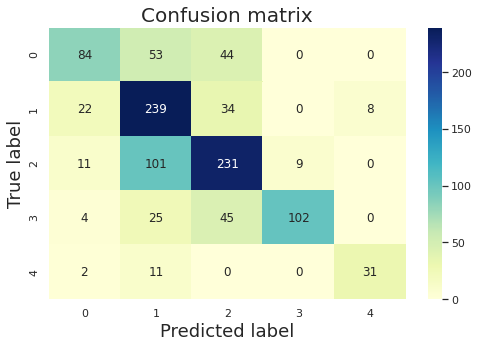

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_8/models/')
filename = "modelrf_AN_5FP_fold8_3.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)